<a href="https://colab.research.google.com/github/geeneelair/-09-313/blob/main/%D0%94%D0%97_%D0%91%D0%94_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Создание базы данных и таблиц

Создайте базу данных library.db и таблицу books с полями:

    id (PRIMARY KEY, AUTOINCREMENT),
    title (TEXT, NOT NULL),
    author (TEXT, NOT NULL),
    year_published (INTEGER),
    genre (TEXT).

2. Вставка данных

Добавьте в таблицу books следующие записи:

    "The Great Gatsby", автор: F. Scott Fitzgerald, год: 1925, жанр: Fiction.
    "1984", автор: George Orwell, год: 1949, жанр: Dystopian.
    "To Kill a Mockingbird", автор: Harper Lee, год: 1960, жанр: Classic.

3. Выборка всех данных

Напишите запрос, который выбирает все книги из таблицы books.
4. Фильтрация данных

Выберите все книги, опубликованные после 1950 года.
5. Использование оператора LIKE

Найдите все книги, название которых начинается с буквы "T".
6. Сортировка данных

Отсортируйте книги по году публикации в порядке возрастания.
7. Ограничение количества строк

Выберите первые две книги из таблицы books, отсортированные по названию.
8. Агрегатные функции

Подсчитайте общее количество книг в таблице books.
9. Группировка данных

Подсчитайте количество книг для каждого жанра.
10. Обновление данных

Обновите год публикации книги "1984" на 1948.
11. Удаление данных

Удалите книгу с названием "The Great Gatsby".
12. Создание индекса

Создайте индекс для столбца author в таблице books.
13. Проверка существования индекса

Проверьте, существует ли индекс для столбца author.
14. Триггер для логирования

Создайте триггер, который записывает изменения в таблицу logs при добавлении новой книги.
15. Транзакции

Создайте программу, которая выполняет следующие действия в рамках одной транзакции:

    Добавляет новую книгу.
    Обновляет год публикации другой книги.
    Отменяет изменения, если возникает ошибка.

16. Пользовательская функция

Создайте пользовательскую функцию на Python, которая вычисляет возраст книги (текущий год минус год публикации), и используйте её в SQL-запросе.
17. Представления

Создайте представление modern_books, которое содержит книги, опубликованные после 1950 года.
18. Удаление таблицы

Удалите таблицу books и проверьте её существование.
19. Композитный индекс

Создайте композитный индекс для столбцов author и year_published в таблице books.
20. Удаление базы данных

Напишите программу, которая удаляет файл базы данных library.db, если он существует.

In [ ]:
import sqlite3
import datetime
import os

# База данных
db_file = 'library.db'
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# 1. Создание таблицы books
cursor.execute('''
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER,
    genre TEXT
)
''')
conn.commit()

# 2. Вставка данных
books_to_insert = [
    ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"),
    ("1984", "George Orwell", 1949, "Dystopian"),
    ("To Kill a Mockingbird", "Harper Lee", 1960, "Classic")
]
cursor.executemany(
    'INSERT INTO books (title, author, year_published, genre) VALUES (?, ?, ?, ?)',
    books_to_insert
)
conn.commit()

# 3. Выборка всех данных
cursor.execute('SELECT * FROM books')
print("Все книги:", cursor.fetchall())

# 4. После 1950 года
cursor.execute('SELECT * FROM books WHERE year_published > ?', (1950,))
print("Книги после 1950:", cursor.fetchall())

# 5. Названия на "T"
cursor.execute("SELECT * FROM books WHERE title LIKE 'T%'")
print("Названия на 'T':", cursor.fetchall())

# 6. Сортировка по году
cursor.execute('SELECT * FROM books ORDER BY year_published ASC')
print("Сортировка по году:", cursor.fetchall())

# 7. Первые две книги по названию
cursor.execute('SELECT * FROM books ORDER BY title ASC LIMIT 2')
print("Первые две книги по названию:", cursor.fetchall())

# 8. Общее количество книг
cursor.execute('SELECT COUNT(*) FROM books')
print("Общее число книг:", cursor.fetchone()[0])

# 9. Количество книг по жанрам
cursor.execute('SELECT genre, COUNT(*) FROM books GROUP BY genre')
print("Книг по жанрам:", cursor.fetchall())

# 10. Обновление года для "1984"
cursor.execute("UPDATE books SET year_published = ? WHERE title = ?", (1948, "1984"))
conn.commit()

# 11. Удаление "The Great Gatsby"
cursor.execute("DELETE FROM books WHERE title = ?", ("The Great Gatsby",))
conn.commit()

# 12. Создание индекса на author
cursor.execute("CREATE INDEX IF NOT EXISTS idx_author ON books(author)")
conn.commit()

# 13. Проверка существования индекса
cursor.execute("""
SELECT name FROM sqlite_master
WHERE type='index' AND tbl_name='books' AND name='idx_author'
""")
print("Индекс idx_author существует:", cursor.fetchone() is not None)

# 14. Триггер для логирования вставок
cursor.execute('''
CREATE TABLE IF NOT EXISTS logs (
    log_id INTEGER PRIMARY KEY AUTOINCREMENT,
    book_id INTEGER,
    action TEXT,
    timestamp TEXT
)
''')
cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_book_insert
AFTER INSERT ON books
BEGIN
    INSERT INTO logs (book_id, action, timestamp)
    VALUES (NEW.id, 'INSERT', datetime('now'));
END;
''')
conn.commit()

# 15. Транзакция: добавить книгу, обновить другую, rollback при ошибке
try:
    conn.execute('BEGIN')
    cursor.execute(
        'INSERT INTO books (title, author, year_published, genre) VALUES (?, ?, ?, ?)',
        ("Brave New World", "Aldous Huxley", 1932, "Dystopian")
    )
    cursor.execute(
        'UPDATE books SET year_published = ? WHERE title = ?',
        (1961, "To Kill a Mockingbird")
    )
    conn.commit()
    print("Транзакция выполнена успешно.")
except Exception as e:
    conn.rollback()
    print("Транзакция откатена из-за ошибки:", e)

# 16. Пользовательская функция book_age
current_year = datetime.datetime.now().year
def book_age(year):
    return current_year - year
conn.create_function("book_age", 1, book_age)
cursor.execute('SELECT title, book_age(year_published) AS age FROM books')
print("Возраст книг:", cursor.fetchall())

# 17. Представление modern_books
cursor.execute("""
CREATE VIEW IF NOT EXISTS modern_books AS
SELECT * FROM books WHERE year_published > 1950
""")
conn.commit()
cursor.execute("SELECT * FROM modern_books")
print("modern_books:", cursor.fetchall())

# 18. Удаление таблицы books и проверка
cursor.execute("DROP TABLE IF EXISTS books")
conn.commit()
cursor.execute("""
SELECT name FROM sqlite_master WHERE type='table' AND name='books'
""")
print("Таблица books существует после DROP:", cursor.fetchone() is not None)

# 19. Композитный индекс
cursor.execute('''
CREATE TABLE books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER,
    genre TEXT
)
''')
conn.commit()
cursor.executemany(
    'INSERT INTO books (title, author, year_published, genre) VALUES (?, ?, ?, ?)',
    books_to_insert
)
conn.commit()
cursor.execute("CREATE INDEX IF NOT EXISTS idx_author_year ON books(author, year_published)")
conn.commit()

# 20. Удаление файла базы данных
conn.close()
if os.path.exists(db_file):
    os.remove(db_file)
    print(f"Файл базы данных '{db_file}' удалён.")
else:
    print(f"Файл базы данных '{db_file}' не найден.")


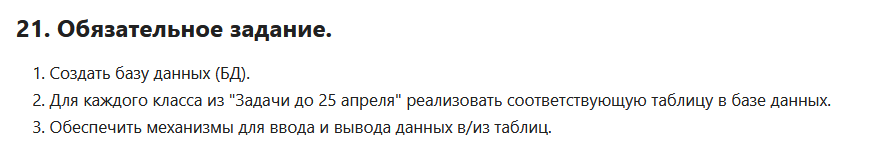

In [ ]:
import sqlite3
import json
import logging
from abc import ABC, abstractmethod, ABCMeta
from datetime import datetime
from dateutil.parser import parse
from typing import Union, Optional, List, Dict, Type

# Создание БД и инициализация таблицы для каждого класса
DB_FILE = 'club.db'

def get_connection():
    conn = sqlite3.connect(DB_FILE)
    conn.row_factory = sqlite3.Row
    return conn


def init_db():
    conn = get_connection()
    c = conn.cursor()
    c.execute('''
        CREATE TABLE IF NOT EXISTS members (
            member_id INTEGER PRIMARY KEY,
            type TEXT NOT NULL,
            name TEXT NOT NULL,
            age INTEGER NOT NULL,
            membership_type TEXT NOT NULL,
            join_date TEXT NOT NULL,
            subscription TEXT,
            specialization TEXT
        )
    ''')
    c.execute('''
        CREATE TABLE IF NOT EXISTS locations (
            location_id INTEGER PRIMARY KEY,
            name TEXT NOT NULL,
            address TEXT NOT NULL
        )
    ''')
    c.execute('''
        CREATE TABLE IF NOT EXISTS training_sessions (
            session_id INTEGER PRIMARY KEY,
            trainer_id INTEGER NOT NULL,
            schedule TEXT NOT NULL,
            location_id INTEGER NOT NULL,
            capacity INTEGER NOT NULL,
            FOREIGN KEY(trainer_id) REFERENCES members(member_id),
            FOREIGN KEY(location_id) REFERENCES locations(location_id)
        )
    ''')
    c.execute('''
        CREATE TABLE IF NOT EXISTS session_participants (
            session_id INTEGER NOT NULL,
            member_id INTEGER NOT NULL,
            PRIMARY KEY(session_id, member_id),
            FOREIGN KEY(session_id) REFERENCES training_sessions(session_id),
            FOREIGN KEY(member_id) REFERENCES members(member_id)
        )
    ''')
    conn.commit()
    conn.close()

init_db()


class PermissionDeniedError(Exception):
    pass


def check_permissions(permission: str):
    def decorator(func):
        def wrapper(self, *args, **kwargs):
            actor = args[0] if args else None
            if not actor or permission not in getattr(actor, 'permissions', []):
                raise PermissionDeniedError(f"Нет прав на действие '{permission}'")
            return func(self, *args, **kwargs)
        return wrapper
    return decorator


class MemberMeta(ABCMeta):
    registry: Dict[str, Type] = {}
    def __init__(cls, name, bases, attrs):
        super().__init__(name, bases, attrs)
        if name != 'Member':
            MemberMeta.registry[name.lower()] = cls


class InvalidMemberError(Exception):
    pass


class SessionFullError(Exception):
    pass

# Добавлена реализация сохранения и загрузки данных из БД
class Member(ABC, metaclass=MemberMeta):
    _id_counter = 1

    def __init__(self, name: str, age: int, membership_type: str, join_date: str):
        if not name or age <= 0 or not membership_type:
            raise InvalidMemberError('Некорректные данные участника')
        self._member_id = Member._id_counter
        Member._id_counter += 1
        self._name = name
        self._age = age
        self._membership_type = membership_type
        self._join_date = parse(join_date)
        self.permissions: List[str] = ['book_session']

    @abstractmethod
    def get_membership_info(self) -> str:
        pass

    @property
    def member_id(self) -> int:
        return self._member_id

    @property
    def name(self) -> str:
        return self._name

    @property
    def age(self) -> int:
        return self._age

    @property
    def membership_type(self) -> str:
        return self._membership_type

    @property
    def join_date(self) -> datetime:
        return self._join_date

    def __str__(self) -> str:
        return f"Член клуба: {self._name}, Тип: {self._membership_type}"

    def to_dict(self) -> Dict:
        data = {
            'member_id': self._member_id,
            'type': self.__class__.__name__.lower(),
            'name': self._name,
            'age': self._age,
            'membership_type': self._membership_type,
            'join_date': self._join_date.isoformat(),
            'subscription': getattr(self, '_subscription', None),
            'specialization': getattr(self, '_specialization', None)
        }
        return data

    @classmethod
    def from_dict(cls, data: Dict) -> 'Member':
        mtype = data['type']
        ctor = MemberMeta.registry.get(mtype)
        if not ctor:
            raise InvalidMemberError(f"Неизвестный тип: {mtype}")
        kwargs = {k: data[k] for k in ['name','age','membership_type','join_date']}
        if mtype == 'client':
            kwargs['subscription'] = data.get('subscription')
        if mtype == 'trainer':
            kwargs['specialization'] = data.get('specialization')
        member = ctor(**kwargs)
        member._member_id = data['member_id']
        return member

    def save(self):
        conn = get_connection()
        c = conn.cursor()
        c.execute('''
            INSERT OR REPLACE INTO members(
                member_id, type, name, age, membership_type, join_date, subscription, specialization
            ) VALUES(?,?,?,?,?,?,?,?)''',(
            self.member_id,
            self.__class__.__name__.lower(),
            self.name,
            self.age,
            self.membership_type,
            self.join_date.isoformat(),
            getattr(self, '_subscription', None),
            getattr(self, '_specialization', None)
        ))
        conn.commit(); conn.close()

    @classmethod
    def load_all(cls) -> List['Member']:
        conn = get_connection(); c = conn.cursor()
        rows = c.execute('SELECT * FROM members').fetchall()
        conn.close()
        return [Member.from_dict(dict(r)) for r in rows]


class Client(Member):
    def __init__(self, name: str, age: int, membership_type: str, join_date: str, subscription: str):
        super().__init__(name, age, membership_type, join_date)
        if not subscription:
            raise InvalidMemberError('Абонемент не указан')
        self._subscription = subscription

    def get_membership_info(self) -> str:
        return f"Клиент: {self.name}, Абонемент: {self._subscription}"

    def __str__(self):
        return self.get_membership_info()


class Trainer(Member):
    def __init__(self, name: str, age: int, membership_type: str, join_date: str, specialization: str):
        super().__init__(name, age, membership_type, join_date)
        if not specialization:
            raise InvalidMemberError('Специализация не указана')
        self._specialization = specialization
        self.permissions.append('extend_membership')

    def get_membership_info(self) -> str:
        return f"Тренер: {self.name}, Специализация: {self._specialization}"

    def __str__(self):
        return self.get_membership_info()


# Добавлена реализация сохранения и загрузки данных из БД
class Location:
    def __init__(self, name: str, address: str):
        self.name = name
        self.address = address
        self.location_id: Optional[int] = None

    def save(self):
        conn = get_connection(); c = conn.cursor()
        if self.location_id is None:
            c.execute('INSERT INTO locations(name,address) VALUES(?,?)', (self.name, self.address))
            self.location_id = c.lastrowid
        else:
            c.execute('UPDATE locations SET name=?, address=? WHERE location_id=?',
                      (self.name, self.address, self.location_id))
        conn.commit(); conn.close()

    @classmethod
    def load_all(cls) -> List['Location']:
        conn = get_connection(); c = conn.cursor()
        rows = c.execute('SELECT * FROM locations').fetchall()
        conn.close()
        locs = []
        for r in rows:
            loc = Location(r['name'], r['address'])
            loc.location_id = r['location_id']
            locs.append(loc)
        return locs

    def __str__(self):
        return f"{self.name} ({self.address})"


# Добавлена реализация сохранения и загрузки данных из БД
class TrainingSession(LoggingMixin, NotificationMixin):
    def __init__(self, trainer: Trainer, schedule: Union[str, datetime], location: Location, capacity: int = 10):
        self.session_id: Optional[int] = None
        self.trainer = trainer
        self.schedule = parse(schedule) if isinstance(schedule, str) else schedule
        self.location = location
        self.capacity = capacity
        self.participants: List[Client] = []

    def save(self):
        conn = get_connection(); c = conn.cursor()
        self.trainer.save()
        self.location.save()
        if self.session_id is None:
            c.execute('''INSERT INTO training_sessions(trainer_id,schedule,location_id,capacity)
                         VALUES(?,?,?,?)''',(
                self.trainer.member_id,
                self.schedule.isoformat(),
                self.location.location_id,
                self.capacity
            ))
            self.session_id = c.lastrowid
        else:
            c.execute('''UPDATE training_sessions SET trainer_id=?,schedule=?,location_id=?,capacity=?
                         WHERE session_id=?''',(
                self.trainer.member_id,
                self.schedule.isoformat(),
                self.location.location_id,
                self.capacity,
                self.session_id
            ))
        c.execute('DELETE FROM session_participants WHERE session_id=?', (self.session_id,))
        for p in self.participants:
            p.save()
            c.execute('INSERT OR IGNORE INTO session_participants(session_id,member_id)
                      VALUES(?,?)', (self.session_id, p.member_id))
        conn.commit(); conn.close()

    @classmethod
    def load_all(cls) -> List['TrainingSession']:
        conn = get_connection(); c = conn.cursor()
        rows = c.execute('SELECT * FROM training_sessions').fetchall()
        sessions = []
        for r in rows:
            trainer = Member.from_dict(dict(c.execute('SELECT * FROM members WHERE member_id=?', (r['trainer_id'],)).fetchone()))
            loc_row = dict(c.execute('SELECT * FROM locations WHERE location_id=?', (r['location_id'],)).fetchone())
            location = Location(loc_row['name'], loc_row['address'])
            location.location_id = loc_row['location_id']
            sess = TrainingSession(trainer, r['schedule'], location, r['capacity'])
            sess.session_id = r['session_id']
            part_ids = c.execute('SELECT member_id FROM session_participants WHERE session_id=?', (sess.session_id,)).fetchall()
            for pid in part_ids:
                mrow = dict(c.execute('SELECT * FROM members WHERE member_id=?', (pid['member_id'],)).fetchone())
                participant = Member.from_dict(mrow)
                sess.participants.append(participant)
            sessions.append(sess)
        conn.close()
        return sessions

    @check_permissions('book_session')
    def book_session(self, participant: Client):
        if len(self.participants) >= self.capacity:
            raise SessionFullError('Сессия переполнена')
        self.participants.append(participant)
        action = f"Участник {participant.name} записан на тренировку {self.session_id}"
        self.log_action(action)
        self.send_notification(f"{participant.name}, вы записаны на тренировку {self.session_id}")

    def generate_report(self) -> str:
        lines = [f"Отчет по тренировке {self.session_id}:",
                 f"Тренер: {self.trainer.name}",
                 f"Дата: {self.schedule}",
                 f"Место: {self.location}",
                 "Участники:"]
        lines += [f"- {p.name}" for p in self.participants]
        return "\n".join(lines)


class MemberFactory:
    @staticmethod
    def create_member(member_type: str, **kwargs) -> Member:
        cls = MemberMeta.registry.get(member_type.lower())
        if not cls:
            raise InvalidMemberError(f"Неизвестный тип участника: {member_type}")
        return cls(**kwargs)


# Запуск кода с сохранением и выгрузкой данных БД
if __name__ == '__main__':
    alice = MemberFactory.create_member('client', name='Alice', age=30, membership_type='Gold', join_date='2025-01-01', subscription='Monthly')
    bob = MemberFactory.create_member('trainer', name='Bob', age=40, membership_type='Staff', join_date='2024-06-15', specialization='Strength')
    alice.save()
    bob.save()

    hall = Location('Main Hall', '123 Fitness St.')
    hall.save()
    session = TrainingSession(bob, '2025-05-01T10:00:00', hall)
    session.save()

    session.book_session(alice)
    session.save()

    members = Member.load_all()
    print('Участники в БД:')
    for m in members:
        print('--', m)

    sessions = TrainingSession.load_all()
    for s in sessions:
        print(s.generate_report())
